In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import tree,datasets, svm, metrics

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score


In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 60.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip3 show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
# Load dataset
!wget 'https://drive.google.com/uc?export=download&id=1eEVCq9XQthnFi27ze_KlHJDUuG2iY_Wu' -O Intrusion.csv -q

In [ ]:
#Read and show dataset
df = pd.read_csv('Intrusion.csv')
df.head()
#print('Data shape', df.shape)

<ipython-input-4-d9766e67c8d5>:2: DtypeWarning: Columns (28,30,41,52,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Intrusion.csv')


,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_invalid,frame.time_relative,ip.src,ip.dst,tcp.srcport,tcp.dstport,eth.src,...,mqtt.topic,mqtt.topic_len,mqtt.username,mqtt.username_len,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,type
0,0.000000,0.000000,1.535972e+09,NaN,0.000000,192.168.1.227,31.13.83.170,57188.0,443.0,48:5a:3f:93:39:9c,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
1,0.005887,0.005887,1.535972e+09,NaN,0.005887,31.13.83.170,192.168.1.227,443.0,57188.0,18:a6:f7:eb:77:26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
2,0.001288,0.001288,1.535972e+09,NaN,0.007175,192.168.1.227,31.13.83.170,57188.0,443.0,48:5a:3f:93:39:9c,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
3,0.010402,0.010402,1.535972e+09,NaN,0.017577,192.168.1.227,31.13.83.170,57188.0,443.0,48:5a:3f:93:39:9c,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
4,0.004078,0.004078,1.535972e+09,NaN,0.021655,192.168.1.227,31.13.83.170,57188.0,443.0,48:5a:3f:93:39:9c,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80893 entries, 0 to 80892
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   frame.time_delta            80893 non-null  float64
 1   frame.time_delta_displayed  80893 non-null  float64
 2   frame.time_epoch            80893 non-null  float64
 3   frame.time_invalid          0 non-null      float64
 4   frame.time_relative         80893 non-null  float64
 5   ip.src                      77106 non-null  object 
 6   ip.dst                      77106 non-null  object 
 7   tcp.srcport                 71757 non-null  float64
 8   tcp.dstport                 71757 non-null  float64
 9   eth.src                     80893 non-null  object 
 10  eth.dst                     80893 non-null  object 
 11  frame.cap_len               80893 non-null  int64  
 12  frame.coloring_rule.name    0 non-null      float64
 13  frame.coloring_rule.string  0 n

In [ ]:
# Define un umbral como un porcentaje del total de filas en el DataFrame
umbral_porcentaje = 10  # Por ejemplo, el 10%
# Calcula el número mínimo de valores no nulos requeridos para que la columna se mantenga
umbral_absoluto = (umbral_porcentaje / 100) * len(df)
# Elimina las columnas que no cumplen con el umbral
df = df.dropna(thresh=umbral_absoluto, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80893 entries, 0 to 80892
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   frame.time_delta            80893 non-null  float64
 1   frame.time_delta_displayed  80893 non-null  float64
 2   frame.time_epoch            80893 non-null  float64
 3   frame.time_relative         80893 non-null  float64
 4   ip.src                      77106 non-null  object 
 5   ip.dst                      77106 non-null  object 
 6   tcp.srcport                 71757 non-null  float64
 7   tcp.dstport                 71757 non-null  float64
 8   eth.src                     80893 non-null  object 
 9   eth.dst                     80893 non-null  object 
 10  frame.cap_len               80893 non-null  int64  
 11  frame.encap_type            80893 non-null  int64  
 12  frame.ignored               80893 non-null  int64  
 13  frame.len                   808

In [ ]:
df.dropna(axis=0, inplace= True)
df.head()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,ip.src,ip.dst,tcp.srcport,tcp.dstport,eth.src,eth.dst,frame.cap_len,frame.encap_type,frame.ignored,frame.len,frame.marked,frame.number,frame.offset_shift,type
0,0.000000,0.000000,1.535972e+09,0.000000,192.168.1.227,31.13.83.170,57188.0,443.0,48:5a:3f:93:39:9c,18:a6:f7:eb:77:26,74,1,0,74,0,1,0.0,normal
1,0.005887,0.005887,1.535972e+09,0.005887,31.13.83.170,192.168.1.227,443.0,57188.0,18:a6:f7:eb:77:26,48:5a:3f:93:39:9c,74,1,0,74,0,2,0.0,normal
2,0.001288,0.001288,1.535972e+09,0.007175,192.168.1.227,31.13.83.170,57188.0,443.0,48:5a:3f:93:39:9c,18:a6:f7:eb:77:26,66,1,0,66,0,3,0.0,normal
3,0.010402,0.010402,1.535972e+09,0.017577,192.168.1.227,31.13.83.170,57188.0,443.0,48:5a:3f:93:39:9c,18:a6:f7:eb:77:26,441,1,0,441,0,4,0.0,normal
4,0.004078,0.004078,1.535972e+09,0.021655,192.168.1.227,31.13.83.170,57188.0,443.0,48:5a:3f:93:39:9c,18:a6:f7:eb:77:26,715,1,0,715,0,5,0.0,normal


In [ ]:
# Identificar columnas categóricas y numéricas
columnas_categoricas = df.select_dtypes(include=['object']).columns
columnas_numericas = df.select_dtypes(exclude=['object']).columns

print('\nColumnas Categóricas:')
print(columnas_categoricas)

print('\nColumnas Numéricas:')
print(columnas_numericas)


Columnas Categóricas:
Index(['ip.src', 'ip.dst', 'eth.src', 'eth.dst', 'type'], dtype='object')

Columnas Numéricas:
Index(['frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch',
       'frame.time_relative', 'tcp.srcport', 'tcp.dstport', 'frame.cap_len',
       'frame.encap_type', 'frame.ignored', 'frame.len', 'frame.marked',
       'frame.number', 'frame.offset_shift'],
      dtype='object')


In [ ]:
label_encoder = LabelEncoder()
# Iterar a través de las columnas categóricas y aplicar LabelEncoder a cada una
for columna in columnas_categoricas:
    df[columna] = label_encoder.fit_transform(df[columna])
# Invertir las asignaciones en todas las columnas categóricas
for columna in columnas_categoricas:
    df[columna] = 1 - df[columna]

In [ ]:
df.info()
print('Data shape', df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71757 entries, 0 to 80892
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   frame.time_delta            71757 non-null  float64
 1   frame.time_delta_displayed  71757 non-null  float64
 2   frame.time_epoch            71757 non-null  float64
 3   frame.time_relative         71757 non-null  float64
 4   ip.src                      71757 non-null  int64  
 5   ip.dst                      71757 non-null  int64  
 6   tcp.srcport                 71757 non-null  float64
 7   tcp.dstport                 71757 non-null  float64
 8   eth.src                     71757 non-null  int64  
 9   eth.dst                     71757 non-null  int64  
 10  frame.cap_len               71757 non-null  int64  
 11  frame.encap_type            71757 non-null  int64  
 12  frame.ignored               71757 non-null  int64  
 13  frame.len                   717

In [ ]:
df.groupby('type').count()

,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,ip.src,ip.dst,tcp.srcport,tcp.dstport,eth.src,eth.dst,frame.cap_len,frame.encap_type,frame.ignored,frame.len,frame.marked,frame.number,frame.offset_shift
type,,,,,,,,,,,,,,,,,
0,69863,69863,69863,69863,69863,69863,69863,69863,69863,69863,69863,69863,69863,69863,69863,69863,69863
1,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894,1894


In [ ]:
#Establecer variable objetivo
y=df['type']
X=df.drop(['type'],axis=1)

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
# Entrenar y evaluar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=5)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("Accuracy RF",rf_accuracy)
print("Precision RF", rf_precision)
print("F1_Score RF",rf_f1)

Accuracy RF 0.9924749163879598
Precision RF 0.8389380530973451
F1_Score RF 0.854054054054054


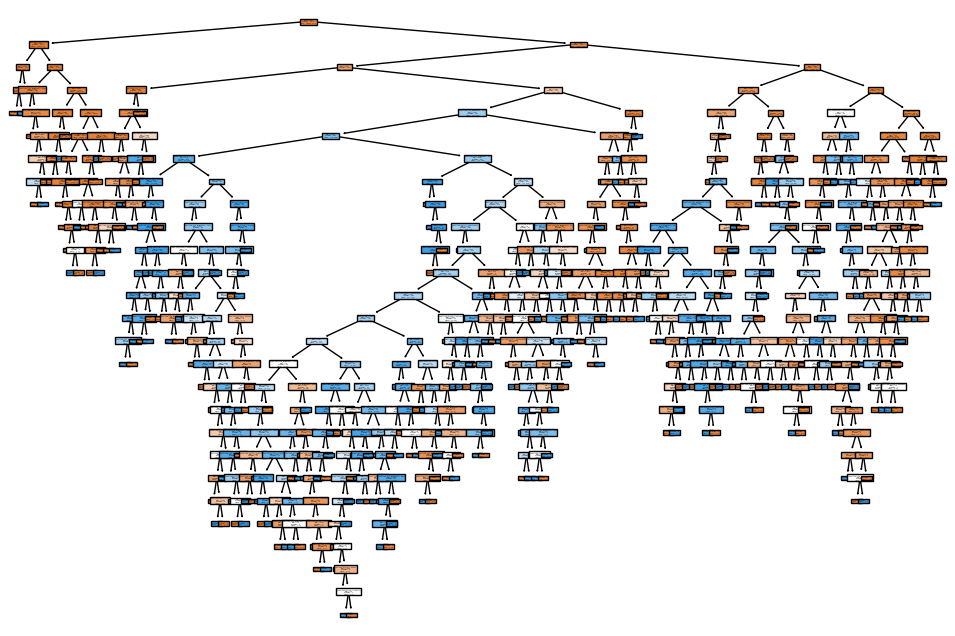

In [ ]:
# Selecciona uno de los árboles del conjunto (cambia el índice si deseas ver otro árbol)
No_tree = 1
# Visualiza el árbol seleccionado
plt.figure(figsize=(12, 8))
tree.plot_tree(rf_model.estimators_[No_tree],feature_names=X.columns, filled=True)
plt.show()

In [ ]:
# Entrenar y evaluar el modelo Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5)
arbol=dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

print("Accuracy DT",dt_accuracy)
print("Precision DT", dt_precision)
print("F1_Score DT",dt_f1)

Accuracy DT 0.9901523597175771
Precision DT 0.7541984732824427
F1_Score DT 0.8233333333333333


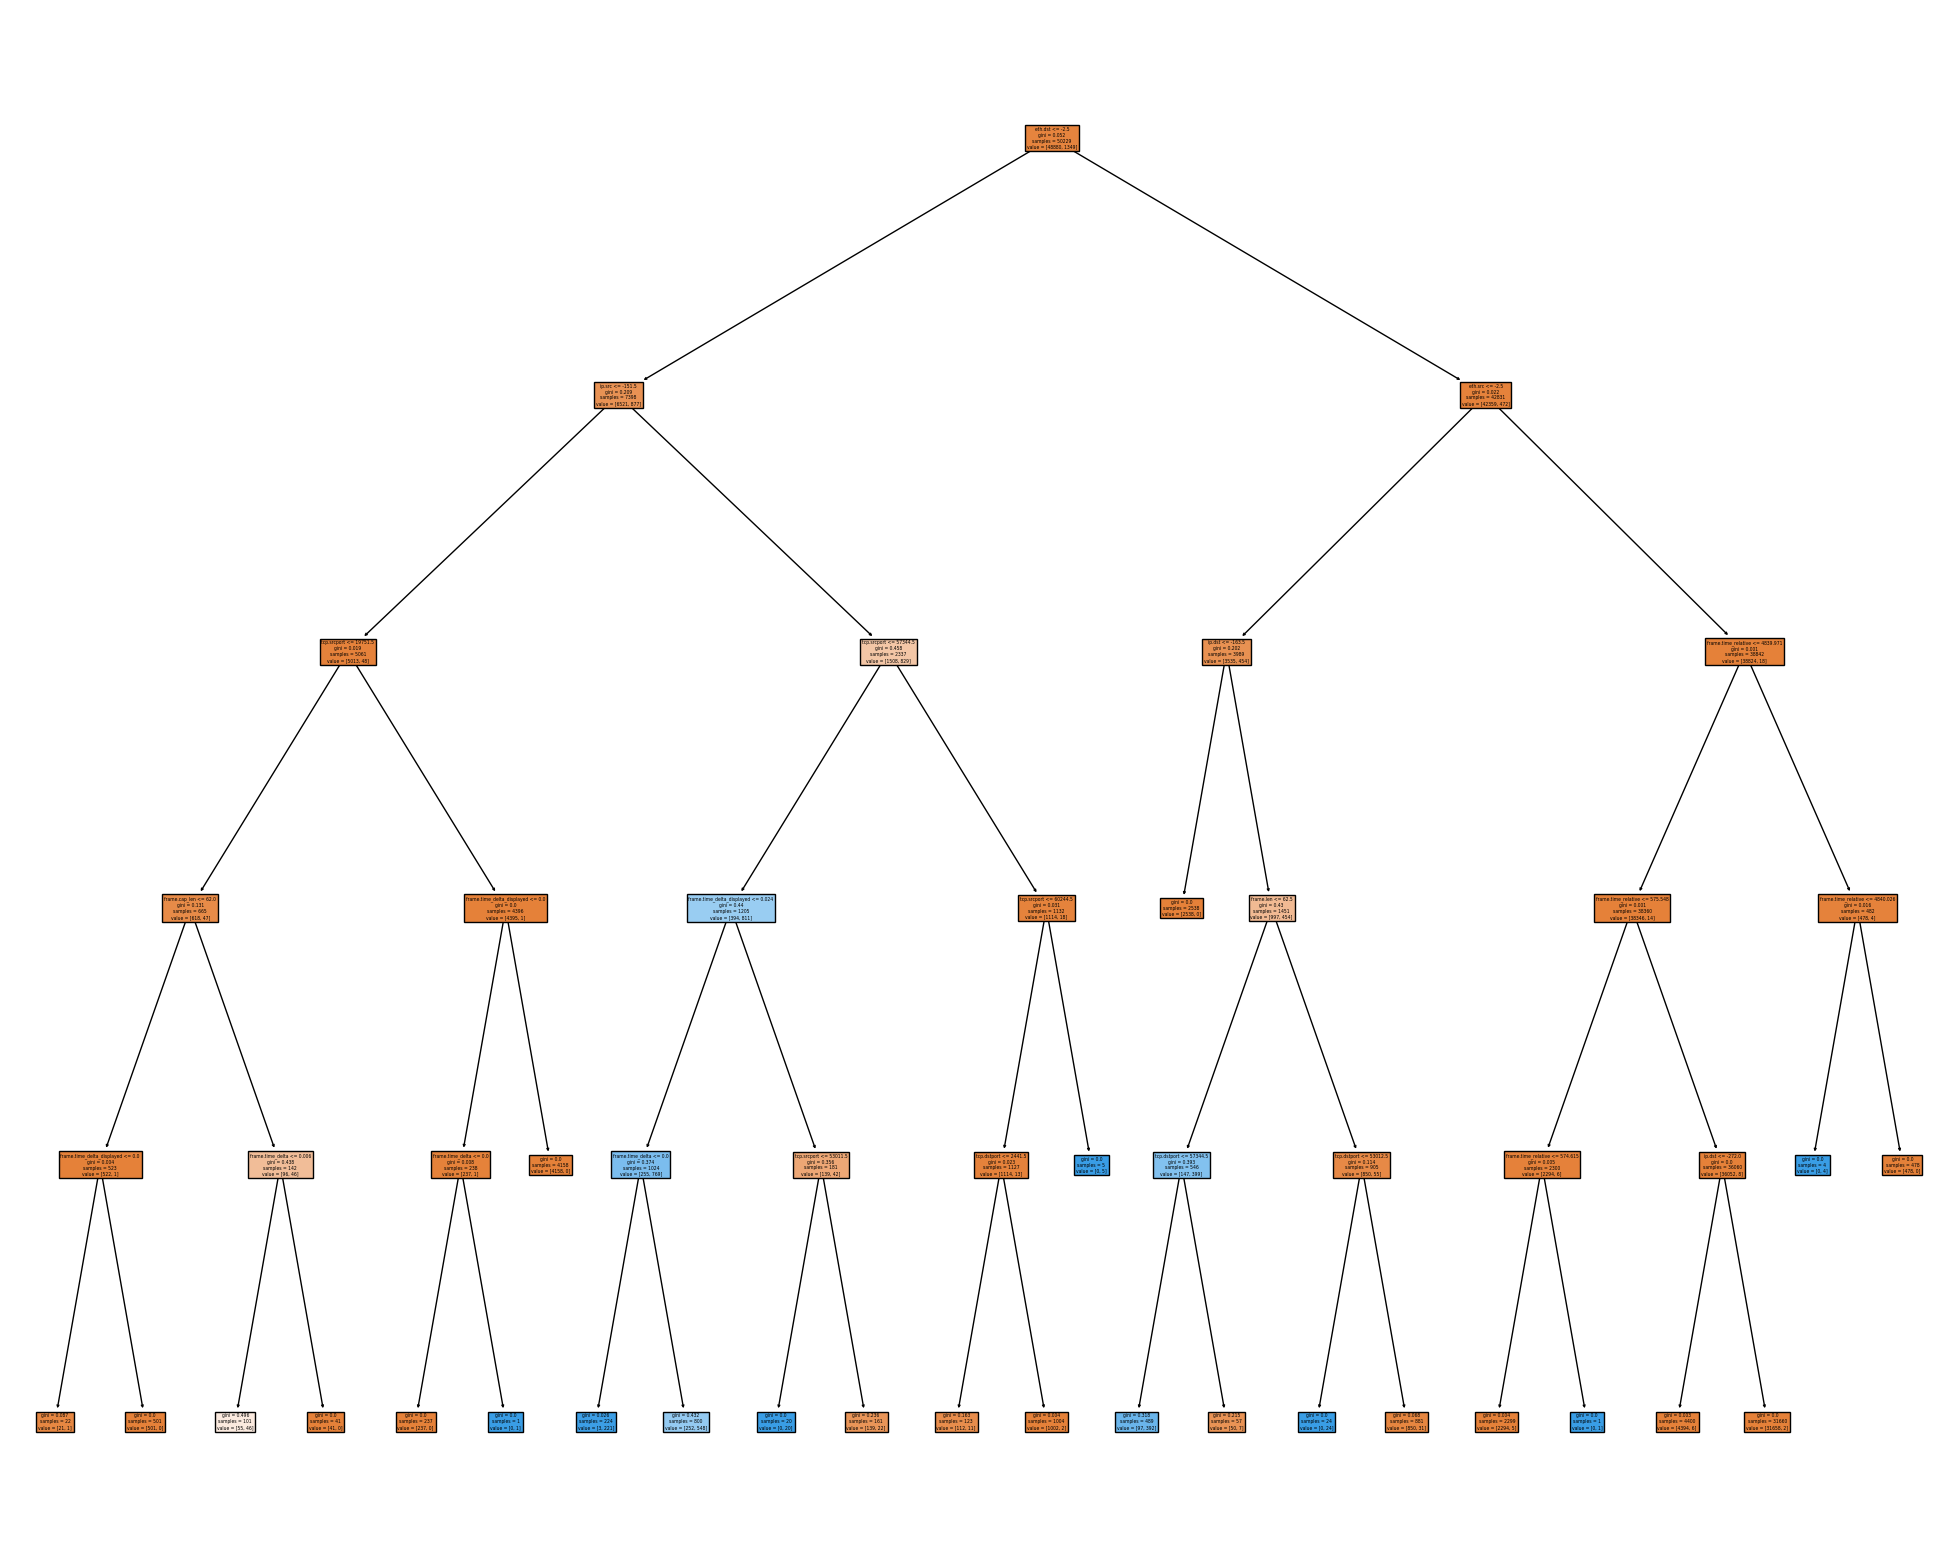

In [ ]:
#plot the tree structure
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt_model,feature_names=X.columns, filled=True)
plt.show()

In [ ]:
# Entrenar y evaluar el modelo Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

print("Accuracy LR",lr_accuracy)
print("Precision LR", lr_precision)
print("F1_Score LR",lr_f1)

Accuracy LR 0.9746841322928279
Precision LR 0.0
F1_Score LR 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
display(y_test.value_counts())

0    20983
1      545
Name: type, dtype: int64

In [ ]:
# Entrenar y evaluar el modelo Support Vector Machine
svm_model = svm.SVC(C= 10, gamma= 0.001,kernel='rbf')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

print("Accuracy SVM",svm_accuracy)
print("Precision SVM", svm_precision)
print("F1_Score SVM",svm_f1)

Accuracy SVM 0.9828130806391676
Precision SVM 0.6629422718808193
F1_Score SVM 0.6580406654343808


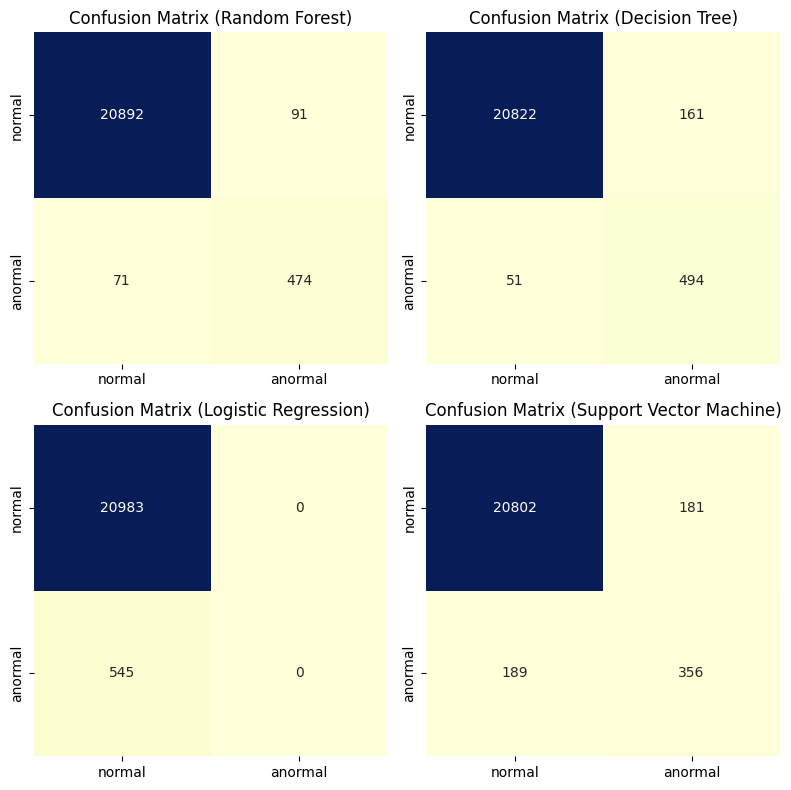

In [ ]:
#predicciones para cada modelo
models = {
    'Random Forest': rf_pred,
    'Decision Tree': dt_pred,
    'Logistic Regression': lr_pred,
    'Support Vector Machine': svm_pred
}

class_names = ['normal', 'anormal']  # Nombre de las clases

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i, (model_name, predictions) in enumerate(models.items()):
    row = i // 2
    col = i % 2

    cnf_matrix = confusion_matrix(y_test, predictions)

    sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='d', cbar=False, ax=axes[row, col])
    axes[row, col].set_xticklabels(class_names, ha="center")
    axes[row, col].set_yticklabels(class_names, va="center")
    axes[row, col].xaxis.set_label_position("top")

    axes[row, col].set_title(f'Confusion Matrix ({model_name})')

plt.tight_layout()
plt.show()


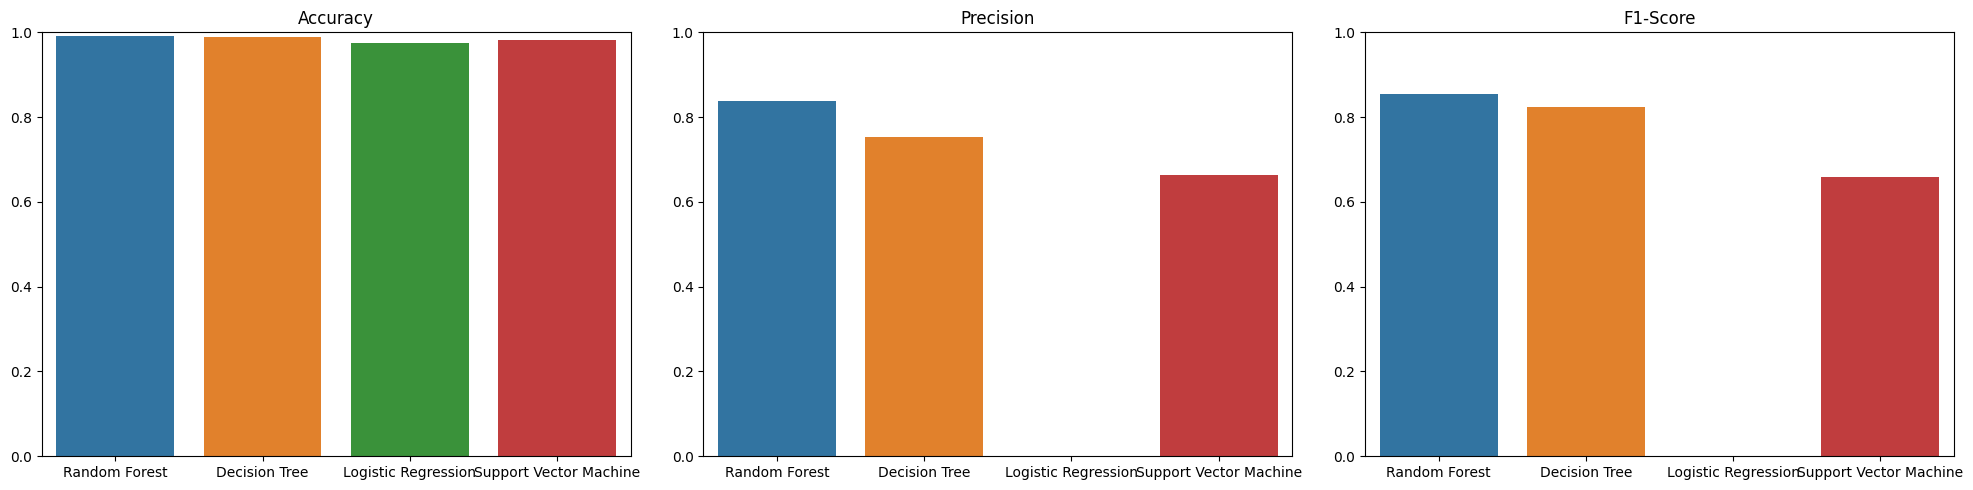

In [ ]:
# Valores de las métricas para cada modelo
accuracy_values = [rf_accuracy, dt_accuracy, lr_accuracy, svm_accuracy]
precision_values = [rf_precision, dt_precision, lr_precision, svm_precision]
f1_values = [rf_f1, dt_f1, lr_f1, svm_f1]

# Crear subgráficos para cada métrica
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'Support Vector Machine']

# Gráfica para Accuracy
sns.barplot(x=models, y=accuracy_values, ax=axs[0])
axs[0].set_title('Accuracy')
axs[0].set_ylim(0, 1)  # Ajusta el rango de valores en el eje y

# Gráfica para Precision
sns.barplot(x=models, y=precision_values, ax=axs[1])
axs[1].set_title('Precision')
axs[1].set_ylim(0, 1)

# Gráfica para F1-Score
sns.barplot(x=models, y=f1_values, ax=axs[2])
axs[2].set_title('F1-Score')
axs[2].set_ylim(0, 1)

# Ajustes para mostrar las gráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()


##Aplicando tecnicas de OverSampling

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_resampled, y_resampled, test_size=0.30,stratify=y_resampled)

ImportError: ignored

In [ ]:
print(y_test_s.value_counts())

In [ ]:
# Entrenar y evaluar el modelo Logistic Regression
lr_model_o = LogisticRegression()
lr_model_o.fit(X_train_s, y_train_s)
lr_pred_o = lr_model_o.predict(X_test_s)

lr_accuracy_o = accuracy_score(y_test_s, lr_pred_o)
lr_precision_o = precision_score(y_test_s, lr_pred_o)
lr_f1_o = f1_score(y_test_s, lr_pred_o)

print("Accuracy LR, con OverSampling",lr_accuracy_o)
print("Precision LR, con OverSampling", lr_precision_o)
print("F1_Score LR, con OverSampling",lr_f1_o)

In [ ]:
# Entrenar y evaluar el modelo Support Vector Machine
svm_model_o = svm.SVC(C= 10, gamma= 0.001,kernel='rbf')
svm_model_o.fit(X_train_s, y_train_s)
svm_pred_o = svm_model.predict(X_test_s)

svm_accuracy_o = accuracy_score(y_test_s, svm_pred_o)
svm_precision_o = precision_score(y_test_s, svm_pred_o)
svm_f1_o = f1_score(y_test_s, svm_pred_o)

print("Accuracy SVM, con OverSampling",svm_accuracy_o)
print("Precision SVM, con OverSampling", svm_precision_o)
print("F1_Score SVM, con OverSampling",svm_f1_o)

In [ ]:
# Entrenar y evaluar el modelo Random Forest
rf_model_o = RandomForestClassifier(n_estimators=100, random_state=5)
rf_model_o.fit(X_train_s, y_train_s)
rf_pred_o = rf_model.predict(X_test_s)

rf_accuracy_o = accuracy_score(y_test_s, rf_pred_o)
rf_precision_o = precision_score(y_test_s, rf_pred_o)
rf_f1_o = f1_score(y_test_s, rf_pred_o)

print("Accuracy RF, con OverSampling",rf_accuracy_o)
print("Precision RF, con OverSampling", rf_precision_o)
print("F1_Score RF, con OverSampling",rf_f1_o)

In [ ]:
# Entrenar y evaluar el modelo Decision Tree
dt_model_o = DecisionTreeClassifier(max_depth=5)
dt_model_o.fit(X_train_s, y_train_s)
dt_pred_o = dt_model.predict(X_test_s)

dt_accuracy_o = accuracy_score(y_test_s, dt_pred_o)
dt_precision_o = precision_score(y_test_s, dt_pred_o)
dt_f1_o = f1_score(y_test_s, dt_pred_o)

print("Accuracy DT, con OverSamplig",dt_accuracy_o)
print("Precision DT, con OverSampling", dt_precision_o)
print("F1_Score DTcon OverSampling",dt_f1_o)

In [ ]:
#predicciones para cada modelo
models = {
    'Random Forest': rf_pred_o,
    'Decision Tree': dt_pred_o,
    'Logistic Regression': lr_pred_o,
    'Support Vector Machine': svm_pred_o
}

class_names = ['normal', 'anormal']  # Nombre de las clases

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i, (model_name, predictions) in enumerate(models.items()):
    row = i // 2
    col = i % 2

    cnf_matrix = confusion_matrix(y_test_s, predictions)

    sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='d', cbar=False, ax=axes[row, col])
    axes[row, col].set_xticklabels(class_names, ha="center")
    axes[row, col].set_yticklabels(class_names, va="center")
    axes[row, col].xaxis.set_label_position("top")

    axes[row, col].set_title(f'CM({model_name}), OverSampling')

plt.tight_layout()
plt.show()

In [ ]:
# Valores de las métricas para cada modelo
accuracy_values = [rf_accuracy_o, dt_accuracy_o, lr_accuracy_o, svm_accuracy_o]
precision_values = [rf_precision_o, dt_precision_o, lr_precision_o, svm_precision_o]
f1_values = [rf_f1_o, dt_f1_o, lr_f1_o, svm_f1_o]

# Crear subgráficos para cada métrica
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'Support Vector Machine']
# Gráfica para Accuracy
sns.barplot(x=models, y=accuracy_values, ax=axs[0])
axs[0].set_title('Accuracy OverSampling')
axs[0].set_ylim(0, 1)  # Ajusta el rango de valores en el eje y

# Gráfica para Precision
sns.barplot(x=models, y=precision_values, ax=axs[1])
axs[1].set_title('Precision OverSampling')
axs[1].set_ylim(0, 1)

# Gráfica para F1-Score
sns.barplot(x=models, y=f1_values, ax=axs[2])
axs[2].set_title('F1-Score OverSampling')
axs[2].set_ylim(0, 1)

# Ajustes para mostrar las gráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()


##Deployment

In [ ]:
import pickle
#exporting the model to .sav file RandomForest
rf_filename = 'rf_modelN.sav'
pickle.dump(rf_model, open(rf_filename, 'wb'))

#exporting the model to .sav file decisionTree
dt_filename = 'dt_modelN.sav'
pickle.dump(dt_model, open(dt_filename, 'wb'))

#exporting the model to .sav file LogisticRegression
lr_filename = 'lr_modelN.sav'
pickle.dump(lr_model, open(lr_filename, 'wb'))

#exporting the model to .sav file SVM
svm_filename = 'svm_model.sav'
pickle.dump(svm_model, open(svm_filename, 'wb'))


In [ ]:
#exporting the model to .sav file RandomForest
rf_filename_o = 'RandomForestO.sav'
pickle.dump(rf_model_o, open(rf_filename_o, 'wb'))

#exporting the model to .sav file decisionTree
dt_filename_o = 'DecisionTO.sav'
pickle.dump(dt_model_o, open(dt_filename_o, 'wb'))

#exporting the model to .sav file LogisticRegression
lr_filename_o = 'LogisticRO.sav'
pickle.dump(lr_model_o, open(lr_filename_o, 'wb'))

#exporting the model to .sav file SVM
svm_filename_o = 'SVMO.sav'
pickle.dump(svm_model_o, open(svm_filename_o, 'wb'))